In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
input_data = df[["Ground Temperature"]]
dependent = df[["Chirps/Second"]]

In [5]:
regression = linear_model.LinearRegression()
regression.fit(input_data, dependent)
print("Linear Regression: y = {}x + {}".format(regression.coef_[0][0], regression.intercept_[0]))

Linear Regression: y = 0.20299973140771355x + 0.4593146452359598


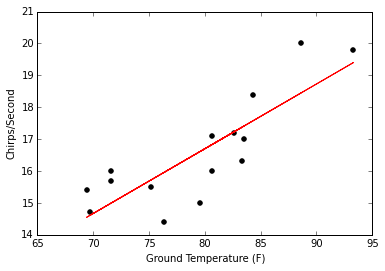

In [6]:
plt.scatter(input_data, dependent, color='black')
plt.plot(input_data, regression.predict(input_data), color='red')
plt.xlabel("Ground Temperature (F)")
plt.ylabel("Chirps/Second")
plt.show()

In [7]:
print("R-squared value = {}".format(regression.score(input_data, dependent)))
print("This fit is decent, but would not be classified as 'strong'")

R-squared value = 0.6922946529146998
This fit is decent, but would not be classified as 'strong'


In [8]:
prediction = regression.predict(95)
print("For a ground temperature of 95F, we would predict crickets to chirp at {} chirps/second".format(prediction[0][0]))

For a ground temperature of 95F, we would predict crickets to chirp at 19.744289128968745 chirps/second


In [9]:
def interpolate(value, regression):
    slope = regression.coef_[0][0]
    intercept = regression.intercept_[0]
    return (value - intercept) / slope

In [10]:
print("For a recorded chirp rate of 18 chirps/second, we would predict a ground temperature of {}F".format(interpolate(18, regression)))

For a recorded chirp rate of 18 chirps/second, we would predict a ground temperature of 86.40743134548568F


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
df2 = pd.read_fwf("brain_body.txt")
input_data2 = df2[["Body"]]
dependent2 = df2[["Brain"]]

In [12]:
regression2 = linear_model.LinearRegression()
regression2.fit(input_data2, dependent2)
print("R-squared value = {}".format(regression2.score(input_data2, dependent2)))
print("Since the R-squared value is over 0.8, we would consider this a strong fit")

R-squared value = 0.8726620843043331
Since the R-squared value is over 0.8, we would consider this a strong fit


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [13]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [14]:
input_data3 = df3[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
dependent3 = df3[["Salary"]]

In [15]:
regression3 = linear_model.LinearRegression()
regression3.fit(input_data3, dependent3)
print("Coefficients: {}".format(regression3.coef_[0]))
print("Intercept: {}".format(regression3.intercept_[0]))
print("R-Squared: {}".format(regression3.score(input_data3, dependent3)))

Coefficients: [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
Intercept: 11410.146547255601
R-Squared: 0.8547180674410969


In [16]:
import itertools
from operator import itemgetter

In [17]:
def find_best(dataframe, dependent_var, independent_vars):
    choices = []
    for number in range(1, len(independent_vars)+1):
        combos = list(itertools.combinations(independent_vars, number))
        for combo in combos:
            combo = list(combo)
            input_data = dataframe[combo]
            dependent = dataframe[dependent_var]
            regression = linear_model.LinearRegression()
            regression.fit(input_data, dependent)
            choices.append((regression.score(input_data, dependent), combo, regression))
    best = sorted(choices, key=itemgetter(0), reverse=True)
    return best[0]

In [18]:
best = find_best(df3, "Salary", ["Sex", "Rank", "Year", "Degree", "YSdeg"])
independent_vars = df3[best[1]]
print("""The best fit has an R-squared of {} and uses {} to predit 
Salary.""".format(best[2].score(independent_vars, dependent3), best[1]))

The best fit has an R-squared of 0.8547180674410969 and uses ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] to predit 
Salary.


In [19]:
input_data4 = df3[['Rank', 'Year', 'YSdeg']]
regression4 = linear_model.LinearRegression()
regression4.fit(input_data4, dependent3)
score1 = best[0]
score2 = regression4.score(input_data4, dependent3)
print("Our best fit had an R-squared of {}.  If we remove Sex, we get an R-squared of {}".format(score1, score2))
print("Since this is only a difference of {} we can conclude that gender does not have as strong\nan impact on salary as the other factors.".format(score1-score2))

Our best fit had an R-squared of 0.8547180674410969.  If we remove Sex, we get an R-squared of 0.8456725764485596
Since this is only a difference of 0.009045490992537264 we can conclude that gender does not have as strong
an impact on salary as the other factors.
